In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from scipy.stats import norm

In [52]:
# def CallPrice(S,K,r,t,sigma,T):
#   d1=(np.log(S/K)+(r+0.5*(sigma**2))*(T-t))/(sigma*(np.sqrt(T-t)))
#   d2=(np.log(S/K)+(r-0.5*(sigma**2)*(T-t)))/(sigma*(np.sqrt(T-t)))
#   return S*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2)
def CallPrice(t,S,K,T,r,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))

    if t==T:
        return (np.max(S-K,0))
    else:
        return(S*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2))

In [53]:
print(CallPrice(0,12,10,1,0.1,0.3))

3.2406113948429747


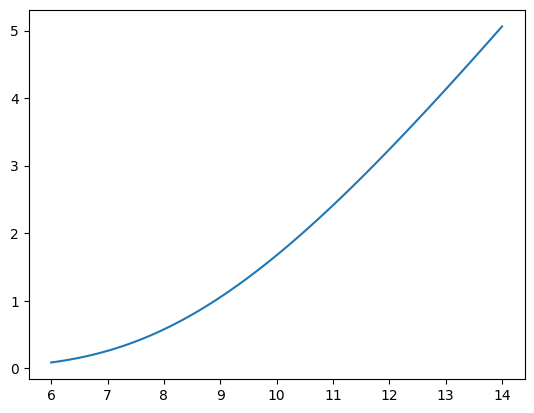

In [54]:
Slist=np.linspace(6,14,100)
CallP=[]
for i in range(100):
  CallP.append(CallPrice(0,Slist[i],10,1,0.1,0.3))

plt.plot(Slist,CallP)
plt.show()

In [55]:

num_values = 100000

# Generate the values for each variable
S_values = np.random.uniform(20, 320, num_values)
r_values = np.random.uniform(0.01, 0.1, num_values)
K_values = np.random.uniform(10, 300, num_values)
T_values = np.random.uniform(0, 1.5, num_values)
sigma_values = np.random.uniform(0.1, 0.8, num_values)

# Create a dictionary with variable names as keys and generated values as values
data = {
    'S': np.random.permutation(S_values),
    'r': np.random.permutation(r_values),
    'K': np.random.permutation(K_values),
    'T': np.random.permutation(T_values),
    'sigma': np.random.permutation(sigma_values)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the resulting DataFrame
print(df)

                S         r           K         T     sigma
0      318.420076  0.084758   88.417265  0.637123  0.731678
1      236.569173  0.074654   14.106704  0.410917  0.486870
2      103.442722  0.090314   65.552833  0.516670  0.780952
3      211.022820  0.091525   57.863630  0.473132  0.250070
4      282.834214  0.073532  129.763319  1.444005  0.727842
...           ...       ...         ...       ...       ...
99995   70.382058  0.017577   46.634889  0.106820  0.435312
99996  130.779651  0.053936  168.275805  0.880612  0.528587
99997  197.729555  0.078628   70.305348  0.037192  0.554739
99998  219.512947  0.099419  289.672476  0.240337  0.623893
99999  122.756775  0.031228  105.063659  0.298803  0.221044

[100000 rows x 5 columns]


In [56]:
from sklearn.model_selection import train_test_split
df['Price']=df.apply(lambda row: CallPrice(0, row['S'], row['K'],row['T'], row['r'], row['sigma']), axis=1)

df.head()


,S,r,K,T,sigma,Price
0,318.420076,0.084758,88.417265,0.637123,0.731678,235.001868
1,236.569173,0.074654,14.106704,0.410917,0.486870,222.888647
2,103.442722,0.090314,65.552833,0.516670,0.780952,45.340600
3,211.022820,0.091525,57.863630,0.473132,0.250070,155.611402
4,282.834214,0.073532,129.763319,1.444005,0.727842,178.313823


In [57]:
df[df['Price'] <= 0]

,S,r,K,T,sigma,Price
169,134.878913,0.025595,280.824968,0.011320,0.161115,0.0
675,34.892825,0.059533,54.820609,0.000061,0.616441,0.0
1901,49.472123,0.049566,202.982634,0.025569,0.191131,0.0
1918,133.815891,0.082824,255.745312,0.001339,0.180186,0.0
1927,67.170173,0.032416,141.757232,0.000875,0.168653,0.0
...,...,...,...,...,...,...
99132,21.760192,0.069207,240.773506,0.006126,0.243631,0.0
99282,26.179198,0.059411,121.885728,0.042425,0.153020,0.0
99551,89.352854,0.069837,246.143446,0.006646,0.256136,0.0
99783,111.041534,0.099036,256.195647,0.043062,0.106081,0.0


In [58]:
y=df['Price']
X=df.drop('Price',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback based on training loss
early_stopping = EarlyStopping(monitor='loss', patience=5)

# Create and compile the model
Model = Sequential()
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
Model.add(Dense(16, input_dim=X.shape[1], activation='elu'))
Model.add(Dense(16, activation='elu'))
Model.add(Dense(16, activation='elu'))
Model.add(Dense(1, activation='linear'))
Model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model with EarlyStopping callback based on training loss
Model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, callbacks=[early_stopping])

# Predict on the test data
y_pred = Model.predict(X_test_scaled)

Epoch 1/100
4375/4375 [==============================] - 7s 2ms/step - loss: 70.9973
Epoch 2/100
4375/4375 [==============================] - 8s 2ms/step - loss: 2.1806
Epoch 3/100
4375/4375 [==============================] - 7s 2ms/step - loss: 1.9196
Epoch 4/100
4375/4375 [==============================] - 9s 2ms/step - loss: 1.5580
Epoch 5/100
4375/4375 [==============================] - 8s 2ms/step - loss: 1.6762
Epoch 6/100
4375/4375 [==============================] - 7s 2ms/step - loss: 1.3604
Epoch 7/100
4375/4375 [==============================] - 8s 2ms/step - loss: 1.3849
Epoch 8/100
4375/4375 [==============================] - 7s 2ms/step - loss: 1.1380
Epoch 9/100
4375/4375 [==============================] - 8s 2ms/step - loss: 1.0699
Epoch 10/100
4375/4375 [==============================] - 7s 2ms/step - loss: 1.1192
Epoch 11/100
4375/4375 [==============================] - 8s 2ms/step - loss: 1.0005
Epoch 12/100
4375/4375 [==============================] - 7s 2ms/step - l

In [59]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the results
print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: 0.9999584484858732
RMSE: 0.47078157337345244


In [60]:
# Assuming you want to generate 1000 values for each variable
num_values = 50000

# Generate the values for each variable
S_values = np.random.uniform(40, 200, num_values)
r_values = np.random.uniform(0.005, 0.08, num_values)
K_values = np.random.uniform(60, 190, num_values)
T_values = np.random.uniform(0, 1.5, num_values)
sigma_values = np.random.uniform(0.1, 0.5, num_values)

# Create a dictionary with variable names as keys and generated values as values
data = {
    'S': np.random.permutation(S_values),
    'r': np.random.permutation(r_values),
    'K': np.random.permutation(K_values),
    'T': np.random.permutation(T_values),
    'sigma': np.random.permutation(sigma_values)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the resulting DataFrame
print(df)
from sklearn.model_selection import train_test_split
df['Price']=df.apply(lambda row: CallPrice(0, row['S'], row['K'],row['T'], row['r'], row['sigma']), axis=1)

df.head()
y_final=df['Price']
X_final=df.drop('Price',axis=1)
X_final=scaler.transform(X_final)
y_pred=Model.predict(X_final)
# Calculate R-squared
r2 = r2_score(y_final, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_final, y_pred, squared=False)

# Print the results
print("R-squared:", r2)
print("RMSE:", rmse)

                S         r           K         T     sigma
0      195.132933  0.010939  105.284746  0.554939  0.331336
1      194.602179  0.023411  186.683697  0.265456  0.437890
2      169.154492  0.012499  177.611300  0.330220  0.319364
3      187.620819  0.076567   98.851473  0.576919  0.375751
4      175.443287  0.038659  124.762561  0.816350  0.334053
...           ...       ...         ...       ...       ...
49995  142.383074  0.060128   75.648910  1.009552  0.189326
49996  178.543973  0.016908  118.959326  0.479535  0.463416
49997   76.521542  0.058929  170.877324  1.336747  0.425896
49998  132.616245  0.069798  158.670535  0.362023  0.159210
49999   98.311402  0.073757  106.375727  0.608877  0.372297

[50000 rows x 5 columns]
1563/1563 [==============================] - 2s 1ms/step
R-squared: 0.999901862421541
RMSE: 0.32266985234180606


In [61]:
# Assuming you want to generate 1000 values for each variable
num_values = 500000

# Generate the values for each variable
S_values = np.random.uniform(80, 200, num_values)
r_values = 0.01
K_values = 150
T_values = np.random.uniform(0.5, 1.5, num_values)
sigma_values = 0.3

# Create a dictionary with variable names as keys and generated values as values
data = {
    'S': np.random.permutation(S_values),
    'r': r_values,
    'K': K_values,
    'T': np.random.permutation(T_values),
    'sigma': sigma_values
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the resulting DataFrame
print(df)
from sklearn.model_selection import train_test_split
df['Price']=df.apply(lambda row: CallPrice(0, row['S'], row['K'],row['T'], row['r'], row['sigma']), axis=1)

df.head()
y_final=df['Price']
X_final=df.drop('Price',axis=1)
X_final=scaler.transform(X_final)
y_pred=Model.predict(X_final)
# Calculate R-squared
r2 = r2_score(y_final, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_final, y_pred, squared=False)

# Print the results
print("R-squared:", r2)
print("RMSE:", rmse)

                 S     r    K         T  sigma
0       138.656075  0.01  150  0.552460    0.3
1       159.238006  0.01  150  1.292375    0.3
2       127.987797  0.01  150  0.787954    0.3
3       147.909134  0.01  150  0.552171    0.3
4       173.997925  0.01  150  1.187543    0.3
...            ...   ...  ...       ...    ...
499995  103.780708  0.01  150  1.115251    0.3
499996  170.119919  0.01  150  0.673860    0.3
499997  174.513478  0.01  150  1.455976    0.3
499998  131.638862  0.01  150  1.315230    0.3
499999  172.213972  0.01  150  1.370154    0.3

[500000 rows x 5 columns]
15625/15625 [==============================] - 22s 1ms/step
R-squared: 0.9992552758641011
RMSE: 0.46181047161850186


313/313 [==============================] - 0s 1ms/step


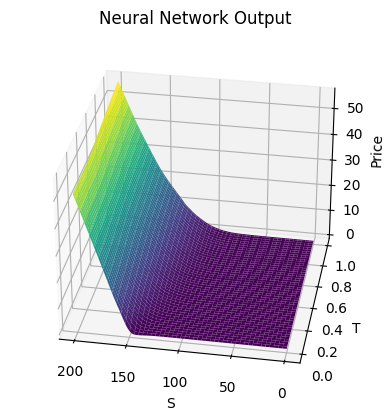

In [62]:

from mpl_toolkits.mplot3d import Axes3D


# Generate a grid of values for S and T
S_grid, T_grid = np.meshgrid(np.linspace(0,200, 100), np.linspace(0, 1, 100))
r_grid=r_values
K_grid=K_values
sigma_grid=sigma_values
# Create an array of constant values based on the length of the grid
constant_values = np.full_like(S_grid, df['r'].iloc[0])

# Create a new DataFrame with S_grid, T_grid, and constant_values
X_pred = pd.DataFrame({'S': S_grid.flatten(),  'r': r_grid,'K': K_grid,'T': T_grid.flatten(), 'sigma': sigma_grid})

# Scale the input values using the same scaler
X_pred_scaled = scaler.transform(X_pred)

# Predict the output using the trained model
y_pred = Model.predict(X_pred_scaled)

# Reshape the predicted values to match the grid shape
y_pred = y_pred.reshape(S_grid.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface( S_grid,T_grid, y_pred, cmap='viridis')

# Set labels and title
ax.set_xlabel('S')
ax.set_ylabel('T')
ax.set_zlabel('Price')
ax.set_title('Neural Network Output')

# Set the viewing angle
ax.view_init(elev=30, azim=280)  # Adjust the values to change the angle
ax.invert_xaxis()

# Show the plot
plt.show()

[[  0.           2.02020202   4.04040404 ... 195.95959596 197.97979798
  200.        ]
 [  0.           2.02020202   4.04040404 ... 195.95959596 197.97979798
  200.        ]
 [  0.           2.02020202   4.04040404 ... 195.95959596 197.97979798
  200.        ]
 ...
 [  0.           2.02020202   4.04040404 ... 195.95959596 197.97979798
  200.        ]
 [  0.           2.02020202   4.04040404 ... 195.95959596 197.97979798
  200.        ]
 [  0.           2.02020202   4.04040404 ... 195.95959596 197.97979798
  200.        ]]


<ipython-input-63-9e52bbeced69>:4: RuntimeWarning: divide by zero encountered in log
  d1=(np.log(S/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
<ipython-input-63-9e52bbeced69>:5: RuntimeWarning: divide by zero encountered in log
  d2=(np.log(S/K)+(r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
<ipython-input-63-9e52bbeced69>:4: RuntimeWarning: divide by zero encountered in double_scalars
  d1=(np.log(S/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
<ipython-input-63-9e52bbeced69>:5: RuntimeWarning: divide by zero encountered in double_scalars
  d2=(np.log(S/K)+(r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))


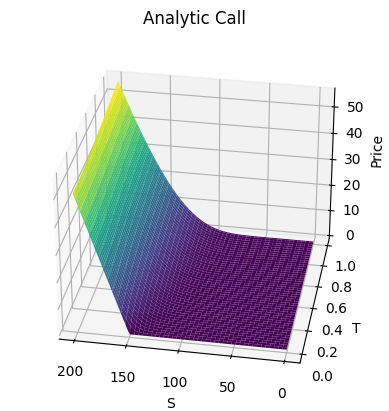

In [63]:

from mpl_toolkits.mplot3d import Axes3D

def CallPrice2(t,S,K,T,r,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return(S*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2))
# Generate a grid of values for S and T
S=np.linspace(0,200, 100)
T=np.linspace(0, 1, 100)
S_grid, T_grid = np.meshgrid(np.linspace(0,200, 100), np.linspace(0, 1, 100))
print(S_grid)
y_pred=np.zeros((100,100))
for i in range(100):
  for j in range(100):
    y_pred[i,j]=CallPrice2(0,S[i],150,T[j],0.01,0.3)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface( S_grid,T_grid, y_pred.T, cmap='viridis')

# Set labels and title
ax.set_xlabel('S')
ax.set_ylabel('T')
ax.set_zlabel('Price')
ax.set_title('Analytic Call')

# Set the viewing angle
ax.view_init(elev=30, azim=280)  # Adjust the values to change the angle
ax.invert_xaxis()

# Show the plot
plt.show()